<img src='../../images/besm.png' width='150px'>
<style>
    
@font-face {font-family: "B Lotus"; src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot"); src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot?#iefix") format("embedded-opentype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff2") format("woff2"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff") format("woff"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.ttf") format("truetype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.svg#B Lotus") format("svg"); }


</style>

<center style ='font-family: "B Lotus";'>بازیابی پیشرفته اطلاعات - درس پردازش زبان‌های طبیعی </center>
<center style ='font-family: "B Lotus";'> آزمایشگاه پردازش هوشمند متن و زبان و علوم انسانی محاسباتی </center>
<br>
<center> http://language.ml </center>
<center> contact: ehsan.asgari [AT] sharif [dot] edu </center>
<center> semesters: Fall 2021 / Spring 2022 (Updated) </center>


</h1> <h1 style='direction:rtl; font-family: "B Lotus";'>فارسی - پیش پردازش و بررسی متن 
    
  

<h2 style='direction:rtl;font-family: "B Lotus";'> § مارک‌آپ  </h2> 

<p style='direction:rtl;font-family: "B Lotus";' >
برای یادگیری بیشتر به این <a href='https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github'> لینک  </a> مراجعه کنید.
        
</p>

<h2 style='direction:rtl;font-family: "B Lotus";'> § نمونه‌ای از متن  </h2> 



In [4]:
path_dir = "../../exploring-datasets/literature/iranian/"

In [9]:
import random 
import numpy as np
import nltk
import pandas as pd
import codecs
import tqdm
    
# Hafez and Saadi collection -- Hafez [0:8384] Saadi[9384::]
HAFEZ_end=8384
SAADI_start=9384
mesra_collection = [x.strip().split() for x in tqdm.tqdm(codecs.open(F'{path_dir}/qazals/all_qazals_mesra.txt','rU','utf-8').readlines())]

100%|███████████████████████████████| 329707/329707 [00:00<00:00, 635746.66it/s]


<h4 style='direction:rtl;font-family: "B Lotus";'> مثال بررسی اولیه داده غزلیات حافظ و سعدی. برای مطالعه بیشتر به مقاله زیر مراجعه کنید  </h4> 

<br/>

Asgari, Ehsaneddin, and Jean-Cédric Chappelier. <b>Linguistic resources and topic models for the analysis of persian poems.</b> <i>Proceedings of NAACL-HLT Workshop on Computational Linguistics for Literature. 2013 </i>.

https://aclanthology.org/W13-1404.pdf 

<h2 style='direction:rtl;font-family: "B Lotus";'> § نرمالایز کردن  </h2> 



In [11]:
from __future__ import unicode_literals
from hazm import *

normalizer = Normalizer()

mesra_normalized = [[normalizer.normalize(y) for y in x] for x in tqdm.tqdm(mesra_collection)]

100%|█████████████████████████████████| 329707/329707 [00:34<00:00, 9497.88it/s]


In [13]:
for x in random.sample(mesra_normalized, 30):
    print(' '.join(x))

که عاشق نکته با زاهد به کیش برهمن گیرد
از سر لطف ببخشود بر احوال عبید
جام حبابی پر آب گر شکند صورتش
بروزگار من آنها که از فراق تو آمد
که آب چشمهٔ رحمت نکرد خاموشم
حیف از نثار گوهر اشک ای عروس بخت
داغم گذاشت در دل و بر ما گذشت و ما
اینک آمد آنکه هر جا سرو قدی ماهروی
که یارب بر سر ما دود دل بال هما باشد
هر که عکس لب تو می‌بیند
گر راست رود سالک، در هر قدمی او را
شربت خوردم پنگان پنگان
تا کی از عشوه نیم مستان را
صد شهر طمع داری در وقت بها کردن
وامانده بود هوش درین دشت بیکران
سر می‌کند عرق ز گریبان ما بلند
کاین روح باکار و کیا بی‌تابش تو جامدست
گل عجزی تصور کن بهارکبریا بنگر
تو به وهم خویش دستی به دعا رسیده باشی
مراعاتی بجای ما نکردی
به زبان چند بگویم که دلم حاضر نیست
ناگه بت من مست به بازار برآمد
چون دل به جایی شد گرو هم کم بگو هم کم شنو
صنما سپاه عشقت به حصار دل درآمد
کند عظام رمیمم هوای خاک درش
که هیج با تو مرا در میان نمی‌گنجد
گر ز شور لب شیرین ز شکر باز آمد
گوش کن نغمه خواجو که شکر می‌شکند
خسرو آنست که چون ملک وصالت دریافت
در صفت عاشقی لفظ و عبارت بسوخت


In [26]:
normalizer.normalize('فیض "روح القدس" ، ار 2باره مدد')

'فیض «روح القدس»، ار ۲باره مدد'

<h2 style='direction:rtl;font-family: "B Lotus";'> § جمله‌بندی  </h2> 



In [27]:
mesra_sentences = [sent_tokenize(' '.join(x)) for x in tqdm.tqdm(mesra_normalized)]

100%|███████████████████████████████| 329707/329707 [00:01<00:00, 288797.47it/s]


In [28]:
for x in random.sample(mesra_sentences, 30):
    print(' ### '.join(x))

ز کعبه روی نشاید به ناامیدی تافت
مدح دارای جهان از دل و جان آیینست
صبح ما رفت به جایی ‌که دمیدن نرسد
سیر باغ خودنماییها اگر منظور نیست
تا یک مژه جاروب کشم خانهٔ زینی
پیش سرچشمهٔ نوشت ز حیا آب شود
چون شرر چشم به ذوق چه‌ گشایم بیدل
تا قبای تو بر اندام تو دیدم، ز حسد
اگر چه در خور تو نیستم، قبولم کن
گفتی کمر به خدمت بربند تو به حرمت
در هر صفت جهانی داریم و نا صبوریم
نور خورشیدی به خاک تیرهٔ مایل چرا
بر نقطهٔ دل یک خط تحقیق تمام است
چشم مستش رهزن خواب است هان! ### بیدار باش
گم شدن فرض است هر دو کون را
که پادشاهان گه گه نظر به عام کنند
به نام عزت اگر دعوی ‌کمال‌ کنی
در سماع آمد و استاد همه مرغان شد
بخند، ای گل کز آب چشم وحشی پرورش داری
گر کشند از راه کینش ور کشند از راه مهر
گفتم گواه اشکم زردی رخ علامت
عشق بستد از ملک باج سجود آدمی
فغان ازین دلی بی‌او نفور گشته ما
بر بوی خط تو روح پاکان
مثال شخص درآیینه‌گرد وحشت اوست
تیغ به دست تو داد خود به کناری نشست
بینوا چبود که سلطان هیچ نیست
زین در نتوان رفت و در آن کو نتوان بود
این مغز فتنه‌، کوچه‌رو استخوان کیست
میشوم از نگاه حسرت آب


In [30]:
sent_tokenize('به خانه رفت.  غذا خورد')

['به خانه رفت.', 'غذا خورد']

<h2 style='direction:rtl;font-family: "B Lotus";'> § توکنایزیشن  </h2> 



In [31]:
mesra_tokens = [[word_tokenize(sent) for sent in sents] for sents in tqdm.tqdm(mesra_sentences)]

100%|███████████████████████████████| 329707/329707 [00:02<00:00, 115274.22it/s]


In [34]:
for x in random.sample(mesra_tokens, 30):
    print(' ### '.join(x[0]))

تا ### قیامت ### سرنگون ### بر ### بوی ### اوست
بی‌تکلف ### زی ### تب ### و ### تاب ### امید ### و ### یاس ### چند
شاعری ### هرچه ### نه ### بر ### سحر ### حلال ### تو ### کنم
گر ### از ### خود ### دیگری ### گوید ### ، ### من ### از ### تو
مدعمرم‌یک‌قلم‌چون ### شمع‌دروحشت‌گذشت
ز ### مزاج ### سایهٔ ### آفتاب ### اثر ### دویی ### نشکافتم
هر ### دم ### چشمت ### از ### آن ### دارمش ### اندر ### نظر
هر ### چه ### امروز ### بریزم ### شکنم ### تاوان ### نیست
غرق ### آبیم ### و ### عین ### ما ### مرشد
تا ### آشنای ### من ### نشود ### آشنای ### دوست
خواه ### ما ### را ### مار ### کن ### خواهی_عصا
آن ### در ### که ### درین ### خاطر ### عطار ### نهادند
هرکه ### شد ### چشم ### تماشای ### تو ### ما ### مژگان ### شدیم
شرر ### تاز ### است ### ‌کوه ### اینجا ### و ### من ### ضبط ### عنان ### دارم
به ### دست ### عشق ### چه ### شیر ### سیه ### چه ### مورچه‌ای
اوصاف ### یوسف ### از ### لب ### اخوان ### شنیدن ### است
به ### هر ### جا ### رسم ### حلقهٔ ### بی‌درم
پر ### میفشان ### ای ### مژه ### تا ### نگس

In [51]:
word_tokenize(normalizer.normalize("غذا می خوردی به خانه رفته بودی، درخت ها را دیدی") )

['غذا',
 'می\u200cخوردی,',
 'به',
 'خانه',
 'رفته_بودی',
 '،',
 'درخت\u200cها',
 'را',
 'دیدی']

<h2 style='direction:rtl;font-family: "B Lotus";'> § تحلیل بسامد  </h2> 

In [52]:
from nltk import FreqDist
import itertools
import pandas as pd

all_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens)))
hafez_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens[0:8384])))
saadi_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens[9384::])))

dataframe = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe[opt] = FreqDist(eval(F"{opt}_tokens")).most_common(50)

freq_analysis = pd.DataFrame(dataframe)    

In [53]:
freq_analysis

,hafez,saadi,all
0,"(که, 2430)","(و, 61729)","(و, 64133)"
1,"(و, 2215)","(از, 54761)","(که, 56940)"
2,"(به, 1797)","(که, 54240)","(از, 56340)"
3,"(از, 1427)","(به, 50112)","(به, 52112)"
4,"(در, 1245)","(در, 45545)","(در, 46918)"
5,"(تو, 835)","(تو, 38730)","(تو, 39719)"
6,"(ز, 752)","(را, 30436)","(را, 31231)"
7,"(این, 661)","(ز, 29035)","(ز, 29827)"
8,"(آن, 653)","(من, 25734)","(من, 26414)"
9,"(من, 617)","(بر, 21816)","(بر, 22440)"


In [10]:
print ('%-16s' % 'Number of words', '%-16s' % len(all_tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(all_tokens)))
avg=np.sum([len(word) for word in all_tokens])/len(all_tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % all_tokens[np.argmax([len(word) for word in all_tokens])])

Number of words  2360566         
Number of unique words 96806           
Average word length 3.430124809050033
Longest word     توبمن‌بگو‌که‌چه‌رای‌تست‌بکنم‌من‌آنچه‌رضای


<h2 style='direction:rtl;font-family: "B Lotus";'> § حذف stop-word  </h2> 

In [58]:
# Persian Stopwords
# https://github.com/sobhe/hazm/blob/master/hazm/data/stopwords.dat
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('stopwords.txt','r','utf-8').readlines()]

In [59]:
all_tokens_nonstop = [t for t in tqdm.tqdm(all_tokens) if t not in stopwords]
hafez_tokens_nonstop = [t for t in tqdm.tqdm(hafez_tokens) if t not in stopwords]
saadi_tokens_nonstop = [t for t in tqdm.tqdm(saadi_tokens) if t not in stopwords]

dataframe_nonstop = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe_nonstop[opt] = FreqDist(eval(F"{opt}_tokens_nonstop")).most_common(50)

freq_analysis_nonstop = pd.DataFrame(dataframe_nonstop)    

100%|█████████████████████████████| 2290919/2290919 [00:05<00:00, 385166.08it/s]


<h4 style='direction:rtl;font-family: "B Lotus";'> برای داده خود لیست stop-word ها را بهبود بدهید </h4> 

In [60]:
freq_analysis_nonstop

,hafez,saadi,all
0,"(دل, 543)","(دل, 21148)","(دل, 21738)"
1,"(حافظ, 457)","(،, 17222)","(،, 17222)"
2,"(ای, 399)","(چو, 13575)","(چو, 13962)"
3,"(چو, 364)","(جان, 12988)","(ای, 13391)"
4,"(سر, 358)","(ای, 12961)","(جان, 13244)"
5,"(گر, 293)","(سر, 12593)","(سر, 12989)"
6,"(باد, 232)","(گر, 11022)","(گر, 11369)"
7,"(جان, 228)","(عشق, 10385)","(عشق, 10617)"
8,"(عشق, 204)","(چشم, 6948)","(چشم, 7170)"
9,"(دست, 204)","(مرا, 6296)","(مرا, 6420)"


<h2 style='direction:rtl;'> § استفاده از lemmatization, stemming  </h2> 

In [14]:
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def get_lemma_set(tok, opt=1):
    if opt ==1:
        return stemmer.stem(tok)
    if opt ==2:
        return lemmatizer.lemmatize(tok)
    if opt ==3:
        # write your own
        pass

In [15]:
opt = 2

all_tokens_nonstop_lemstem =   [get_lemma_set(t, opt) for t in tqdm.tqdm(all_tokens_nonstop)]
hafez_tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm.tqdm(hafez_tokens_nonstop)]
saadi_tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm.tqdm(saadi_tokens_nonstop)]

dataframe_nonstop_lemstem = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe_nonstop_lemstem[opt] = FreqDist(eval(F"{opt}_tokens_nonstop_lemstem")).most_common(50)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)   
freq_analysis_nonstop_lemstem

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1491044/1491044 [00:02<00:00, 644419.67it/s]


,hafez,saadi,all
0,"(ز, 752)","(ز, 29035)","(ز, 29827)"
1,"(دل, 678)","(دل, 26143)","(دل, 26881)"
2,"(حافظ, 461)","(،, 17222)","(،, 17222)"
3,"(ای, 401)","(جان, 15257)","(جان, 15543)"
4,"(سر, 388)","(چو, 13579)","(سر, 13992)"
5,"(چو, 364)","(سر, 13562)","(چو, 13966)"
6,"(گر, 321)","(ای, 13018)","(ای, 13450)"
7,"(گفت#گو, 255)","(عشق, 11962)","(عشق, 12223)"
8,"(جان, 253)","(گر, 11279)","(گر, 11657)"
9,"(باد, 244)","(چشم, 8475)","(چشم, 8748)"


<h2 style='direction:rtl;'> § استفاده از POS-tags  </h2> 

In [7]:
tagger = POSTagger(model='../../resources/postagger.model')

In [17]:
import copy
dataframe_nonstop_lemstem_advjj = {}

for opt in tqdm.tqdm(['hafez', 'saadi', 'all']):
    selected = []
    for x,y in FreqDist(eval(F"{opt}_tokens_nonstop_lemstem")).most_common(1000):
        pos = tagger.tag([x])[0][1]
        if pos in ['AJ']:
            selected.append((x,y)) 
    dataframe_nonstop_lemstem_advjj[opt]= copy.deepcopy(selected[0:40])

dataframe_nonstop_lemstem_advjj = pd.DataFrame(dataframe_nonstop_lemstem_advjj)    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.84it/s]


In [18]:
# change the code to get the POS's in the sentences

In [19]:
dataframe_nonstop_lemstem_advjj

,hafez,saadi,all
0,"(خوش, 208)","(خوش, 4087)","(خوش, 4309)"
1,"(مست, 115)","(مست, 4002)","(مست, 4131)"
2,"(خراب, 45)","(داغ, 1337)","(داغ, 1353)"
3,"(سیاه, 36)","(روشن, 1277)","(روشن, 1298)"
4,"(غریب, 34)","(بد, 1229)","(بد, 1261)"
5,"(بد, 32)","(پنهان, 1131)","(پنهان, 1158)"
6,"(پاک, 29)","(نهان, 1020)","(نهان, 1044)"
7,"(سیه, 25)","(تنگ, 1014)","(تنگ, 1038)"
8,"(عارض, 25)","(خراب, 861)","(خراب, 908)"
9,"(دراز, 24)","(گرم, 856)","(گرم, 879)"


<h2 style='direction:rtl;'> § دیدن سیاق  </h2> 

In [20]:
hafez_text = nltk.Text(hafez_tokens_nonstop_lemstem)
hafez_text.concordance('آب')

Displaying 25 of 25 matches:
ند بخارا داد#ده ساقی باقی جنت یافت#یاب آب رکن آباد گلگشت مصلا فغان کاین لولیان ش
خوان یغما ز عشق ناتمام جمال یار مستغنی آب رنگ خال خط حاجت زیبا حسن روزافزون یوسف
ایمان یار مرد خدا با کشتی نوح #هست خاک آب خرید#خر طوفان برو خانه گردون نان مطلب 
 صرفه نبرد روز بازخواست نان حلال شیخ ز آب حرام حافظ ز دیده دانه اشک همی‌فشان مرغ
ق نعمت حاجی قوام ای فروغ ماه حسن رخشان آب چاه زنخدان عزم دیدار جان لب بازگردد بر
بخت خواب آلود بیدار مگر زان زد#زن دیده آب رخشان صبا همراه فرستاد#فرست رخت گلدسته
قدس کشید#کش بند نقاب ای مرغ بهشتی دانه آب خوابید#خواب بشد دیده جگرسوز کاغوش منزل
اد شنید#شنو پیداست نگارا بلند جنابت سر آب بادیه هش غول بیابان نفریبد سراب ره پیر
 انداخت#انداز شراب خورده خو رفت#رو چمن آب آتش ارغوان انداخت#انداز بزمگاه چمن دوش
دمی زین هوا مغبچگانم انداخت#انداز کنون آب لعل خرقه شد#شو نصیبه ازل نمی‌توان اندا
دلسوز برف دل بیگانه بسوخت خرقه زهد مرا آب خرابات ببرد خانه عقل مرا آتش میخانه بس
فسوس دلبر دیده گریان تحریر خیال خط نقش آب بیدار شو ای دیده ایمن توانست#توان زین 

In [27]:
hafez_text[0]

'الا'

<h2 style='direction:rtl;'> § چانکینگ - عبارت یابی -- عبارات منظم   </h2> 

In [21]:
for sent in mesra_tokens[0:10]:
    print(tagger.tag(sent[0]))
    print()

[('الا', 'RES'), ('یا', 'CONJ'), ('ایها', 'RES'), ('الساقی', 'RES'), ('ادر', 'RES'), ('کاسا', 'RES'), ('و', 'RES'), ('ناولها', 'RES')]

[('که', 'CONJ'), ('عشق', 'N'), ('آسان', 'AJ'), ('نمود', 'V'), ('اول', 'ADV'), ('ولی', 'CONJ'), ('افتاد', 'V'), ('مشکل\u200cها', 'N')]

[('به', 'P'), ('بوی', 'Ne'), ('نافه\u200cای', 'N'), ('کاخر', 'ADV'), ('صبا', 'ADV'), ('زان', 'P'), ('طره', 'N'), ('بگشاید', 'V')]

[('ز', 'Pe'), ('تاب', 'Ne'), ('جعد', 'Ne'), ('مشکینش', 'AJ'), ('چه', 'DET'), ('خون', 'N'), ('افتاد', 'V'), ('در', 'P'), ('دل\u200cها', 'N')]

[('مرا', 'PRO'), ('در', 'P'), ('منزل', 'Ne'), ('جانان', 'N'), ('چه', 'ADV'), ('امن', 'AJ'), ('عیش', 'N'), ('چون', 'CONJ'), ('هر', 'DET'), ('دم', 'N')]

[('جرس', 'N'), ('فریاد', 'N'), ('می\u200cدارد', 'V'), ('که', 'CONJ'), ('بربندید', 'V'), ('محمل\u200cها', 'N')]

[('به', 'P'), ('می', 'N'), ('سجاده', 'V'), ('رنگین', 'AJ'), ('کن', 'V'), ('گرت', 'CONJ'), ('پیر', 'Ne'), ('مغان', 'N'), ('گوید', 'V')]

[('که', 'CONJ'), ('سالک', 'N'), ('بی\u200cخبر', 'AJ'), (

In [24]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      GHEIDV: {<ADV><V>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

Unable to revert mtime: /Library/Fonts


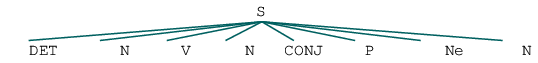

In [25]:
vasf_ext(tagger.tag(mesra_tokens[100][0]))

In [26]:
mosufs = []
gheids = []
for sentence in tqdm.tqdm(mesra_tokens[0:HAFEZ_end]):
    tree=vasf_ext(tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8384/8384 [00:02<00:00, 4048.84it/s]


In [27]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]

In [28]:
mosuf_texts[0:10]

['عشق آسان',
 'جعد مشکینش',
 'سالک بی\u200cخبر',
 'شب تاریک',
 'چراغ مرده',
 'یاد خوشش',
 'رکن آباد',
 'کار شهرآشوب',
 'یار مستغنی',
 'روی زیبا']

In [29]:
results = {}

results['hafez'] = nltk.FreqDist(mosuf_texts).most_common(50)

In [30]:
mosufs = []
gheids = []
for sentence in tqdm.tqdm(mesra_tokens[SAADI_start::]):
    tree=vasf_ext(tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320323/320323 [01:16<00:00, 4161.02it/s]


In [31]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
mosuf_texts[0:10]

['عشق غالب',
 'گلبن خندان',
 'سرو آزاد',
 'گل صدبرگ',
 'لبت کبابی',
 'داروی دلپذیر',
 'سرو روان',
 'گلبن نو',
 'معاشران هشیار',
 'چراغ باز']

In [32]:
results['saadi'] = nltk.FreqDist(mosuf_texts).most_common(50)

In [33]:
pd.DataFrame(results)

,hafez,saadi
0,"(چشم بد, 10)","(چشم بد, 100)"
1,"(ماه نو, 6)","(چشم تر, 97)"
2,"(می ناب, 5)","(ماه نو, 83)"
3,"(یار سفرکرده, 5)","(سرو روان, 76)"
4,"(لب جوی, 5)","(دل خسته, 70)"
5,"(مرغ زیرک, 5)","(آب روان, 60)"
6,"(دل خوش, 5)","(می نوش, 57)"
7,"(می صاف, 5)","(دل پر, 56)"
8,"(خانه خمار, 4)","(دل تنگ, 51)"
9,"(خط مشکین, 4)","(دل دیوانه, 50)"


# Weighted Levenshtein Distance

In [34]:
#!pip install -U strsimpy
import pandas as pd
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    return 2.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [35]:
print(weighted_levenshtein.distance('لانه', 'لثه'))

3.0


In [36]:
print(weighted_levenshtein.distance('لانه', 'لاله'))

2.0


In [37]:
print(weighted_levenshtein.distance('لانه', 'لستم'))

6.0


In [38]:
print(weighted_levenshtein.distance('لثه', 'لستم'))

5.0
